<a href="https://colab.research.google.com/github/andreas31603/MechaineLearningTasks/blob/main/Task9/Classification_model_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

In [3]:
# Membaca file dataset
file_path = '/content/drive/MyDrive/Dataset/MaterialStrength.csv'
data_classification = pd.read_csv(file_path)

In [16]:
# Menampilkan lima baris pertama dan lima baris terakhir
print("\nLima Baris Pertama:")
print(data_classification.head(5))
print("\nLima Baris Terakhir:")
print(data_classification.tail(5))


Lima Baris Pertama:
      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  target_binary  
0  1.538462    1  0.350044  YEs   NO           79.99              1  
1  1.560651    1  0.452416  yES  nOO           61.89              1  
2  1.569024    0  6.704743  yEs   NO           40.27              1  
3  1.569024    0  8.891596  yes  NOO           41.05              1  
4  1.185221    0  8.126411  YeS   no           44.30              1  

Lima Baris Terakhir:
         x1     x2     x3     x4    x5     x6     x7  x8        x9    x10  \
1025  276.4  116.0   

In [17]:
# Menampilkan tipe data setiap kolom
print("\nTipe Data Kolom:")
print(data_classification.dtypes)


Tipe Data Kolom:
x1                float64
x2                float64
x3                float64
x4                float64
x5                float64
x6                float64
x7                float64
x8                  int64
x9                float64
x10               float64
x11               float64
x12                 int64
x13               float64
x14                object
x15                object
target_feature    float64
target_binary       int64
dtype: object


In [19]:
# Mengecek dan Menghapus Baris Duplikat
duplicate_rows = data_classification[data_classification.duplicated()]
print("\nJumlah Baris Duplikat yang Ditemukan:", duplicate_rows.shape[0])


Jumlah Baris Duplikat yang Ditemukan: 0


In [4]:
# Preprocessing dataset
# Mengonversi target ke biner: klasifikasi berdasarkan median nilai target
data_classification['target_binary'] = (data_classification['target_feature'] >= data_classification['target_feature'].median()).astype(int)


In [5]:
# Memisahkan fitur dan target
X = data_classification.drop(columns=['target_feature', 'target_binary'])
y = data_classification['target_binary']

In [6]:
# Menangani nilai kategorikal dengan LabelEncoder
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

In [7]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Membagi data menjadi set latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Membuat model klasifikasi SVM dengan kernel RBF
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)

In [10]:
# Melatih model pada data latih
svm_classifier.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [11]:
# Melakukan prediksi pada data uji
y_pred = svm_classifier.predict(X_test)
y_proba = svm_classifier.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

In [12]:
# Evaluasi model menggunakan metrik klasifikasi
accuracy = accuracy_score(y_test, y_pred)                # Akurasi
precision = precision_score(y_test, y_pred)              # Presisi
recall = recall_score(y_test, y_pred)                    # Recall
f1 = f1_score(y_test, y_pred)                            # F1-Score
roc_auc = roc_auc_score(y_test, y_proba)                 # ROC-AUC

# Menampilkan metrik evaluasi
evaluation_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}
print(pd.DataFrame([evaluation_results]))

   Accuracy  Precision    Recall  F1-Score  ROC-AUC
0  0.898058   0.882883  0.924528  0.903226  0.95566


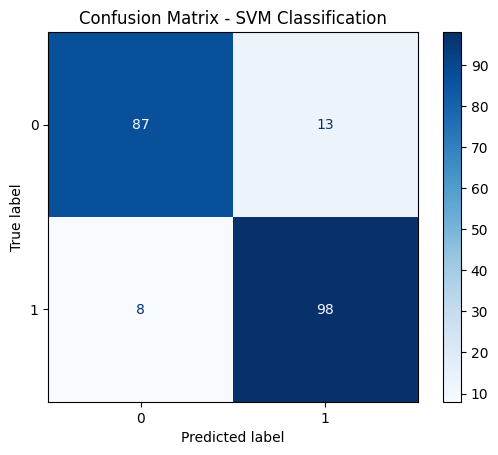

In [13]:
# Menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM Classification")
plt.show()

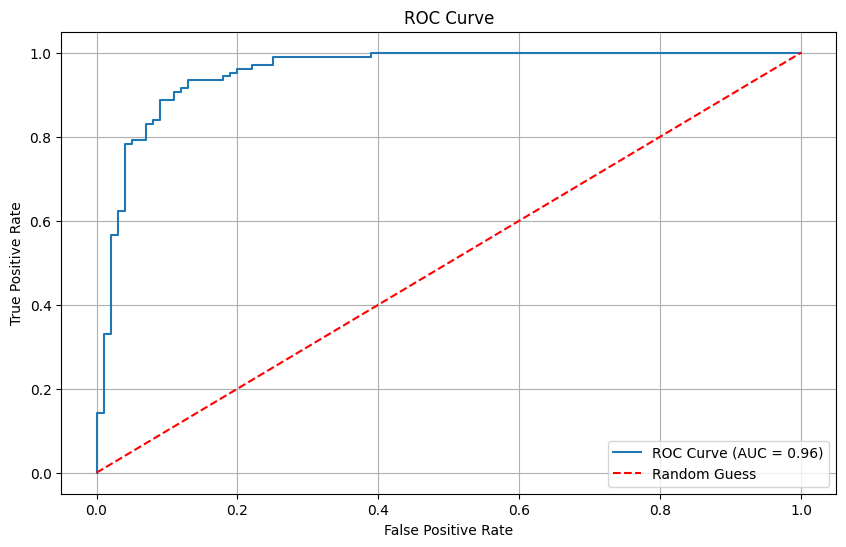

In [14]:
# Menampilkan ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()